<a href="https://colab.research.google.com/github/fatemeh-kn/image-processing/blob/main/PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing indicators from color distribution



## Requiered Libraries


In [ ]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

#import bokeh
from bokeh.plotting import figure, show,  output_file
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
# test Bokeh
from bokeh.io import output_notebook
output_notebook()



## PCA

In [ ]:
def pca_analysis_scatter(excel_file, wSheet , n_components=4):
    """
    Reads an Excel file, performs PCA analysis for the specified number of components,
    creates scatter plots of the principal components (PCs), highlights selected points
    across all plots, and prints the names of selected samples.

    Args:
        excel_file (str): Path to the Excel file.
        n_components (int, optional): Number of principal components to analyze. Defaults to 4.
    """

    # Read the Excel file
    data = pd.read_excel(excel_file, sheet_name=wSheet)
    data.rename(columns={'SN': 'Sample Name'}, inplace=True)

    # Select the main features (assuming numerical columns)
    features = data.select_dtypes(include=[np.number])
    features = features.drop(columns=['Sample Name', 'Check','status'])

    # Perform PCA analysis
    pca = PCA(n_components=n_components)
    pcs = pca.fit_transform(features)

    #print("Explained Variance: ", pca.explained_variance_ratio_)
    #print("Components: ", pca.components_)

    # Create scatter plots for each PC
    fig, axes = plt.subplots(n_components-1, n_components-1, figsize=(16, 16))  # Adjust figure size as needed

    for i in range(n_components-1):
        for j in range(i + 1, n_components):
            ax = axes[i,j-1]
            ax.scatter(pcs[:, i], pcs[:, j], c=data['status'])
            ax.set_title(f"PC{i+1} vs. PC{j+1}")

            ax.set_xlabel(f"PC{i+1}")
            ax.set_ylabel(f"PC{j+1}")

    plt.show()
    return pca, data, features.columns

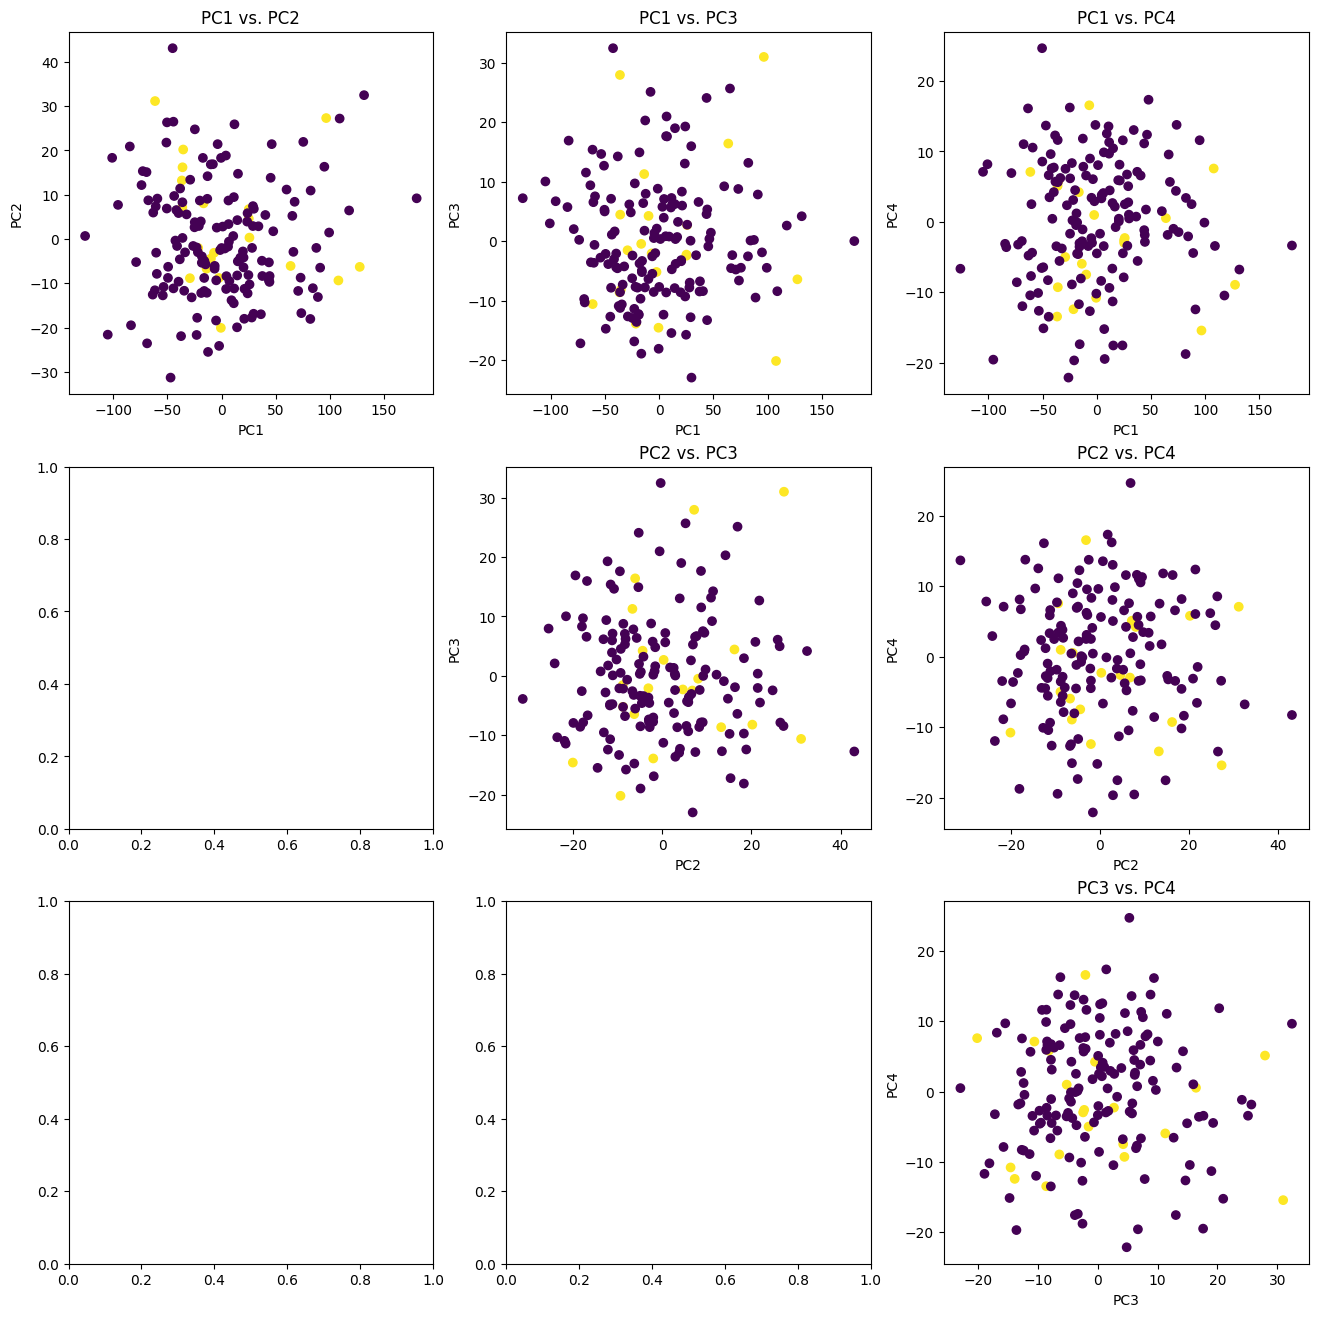

In [ ]:
# Example usage (replace 'your_data.xlsx' with your actual file path)
pca_result, data, Xs =pca_analysis_scatter('/content/Test_fake grouping.xlsx', 'Data')

In [ ]:
pca_df = pd.DataFrame(data = pca_result.components_, columns = Xs)
pca_df.head()

,R 0.05,R 0.25,R 0.50,R 0.75,R 0.95,G 0.05,G 0.25,G 0.50,G 0.75,G 0.95,...,B 0.50,B 0.75,B 0.95,R average,red fraction (R 0.05),red fraction (R 0.25),red fraction (R 0.5),red fraction (R 0.75),red fraction (R 0.95),erythema index
0,-0.267542,-0.275776,-0.265433,-0.254893,-0.242101,-0.253696,-0.268861,-0.266723,-0.264033,-0.257657,...,-0.254428,-0.249877,-0.243216,-0.011887,0.000160,0.000148,0.000128,0.000084,0.000047,0.000224
1,0.029434,0.059500,0.070244,0.066511,0.063365,-0.026603,0.004254,0.012715,0.011756,0.014873,...,-0.042827,-0.040265,-0.037067,-0.981846,0.000162,0.000140,0.000106,0.000161,0.000112,0.000220
2,-0.455522,-0.032465,0.127490,0.224965,0.321042,-0.454880,-0.078156,0.078592,0.188781,0.284880,...,0.027469,0.126557,0.221856,0.083214,0.000156,0.000076,-0.000029,0.000106,0.000069,0.000452
3,0.366369,0.391122,0.341045,0.302103,0.262544,-0.043318,-0.030510,-0.058832,-0.109325,-0.150925,...,-0.259059,-0.296786,-0.322891,0.165176,0.000813,0.000762,0.000715,0.000441,0.000395,0.001191


## Same Analysis visualized using Bokeh

In [ ]:
# Read the Excel file
data = pd.read_excel("/content/Test_fake grouping.xlsx", "Data")
data.rename(columns={'SN': 'Sample Name'}, inplace=True)

# Select the main features (assuming numerical columns)
features = data.select_dtypes(include=[np.number]).drop(columns=['Sample Name', 'Check','status'])

# Number of principal components to analyze
n_components = 4

# Perform PCA analysis
pca = PCA(n_components=n_components)
pcs = pca.fit_transform(features)

print(pca.explained_variance_ratio_)

[0.86123974 0.05798557 0.03650412 0.02606372]


In [ ]:
from bokeh.io import curdoc
curdoc().clear()


In [ ]:
pca_data = pca.fit_transform(features)
update_highlight=[]

# Create scatter plots for each PC combination
plots = []

mapper = linear_cmap(field_name='status', palette=Spectral6, low = 0, high = 1)
source =pd.DataFrame({
        "pc1":pca_data[:,0],
        "pc2":pca_data[:,1],
        "pc3":pca_data[:,2],
        "pc4":pca_data[:,3],
        "SN":data['Sample Name'],
        "status":data['status']
        })

for i in range(3):
  for j in range(i+1,4):

    p = figure(title=f"PC{i+1} vs PC{j+1}", tools = ["lasso_select,box_select"])
    p.circle("pc"+str(i+1), "pc"+str(j+1), size=10,  hover_alpha=1,color = mapper,source=source)
    plots.append(p)


In [ ]:
source.head()

,pc1,pc2,pc3,pc4,SN,status
0,63.759196,-6.091017,16.411281,0.533164,4,1
1,127.561383,-6.300521,-6.427641,-8.932252,14,1
2,-0.606964,-20.076935,-14.570020,-10.781926,28,1
3,-13.805587,-6.701379,11.276599,-5.948781,35,1
4,-36.617955,13.217349,-8.621375,-13.445810,39,1


In [ ]:
show(row(plots))

In [ ]:
from bokeh.models.tools.SelectTool import LassoSelectTool
from bokeh.models import ColumnDataSource, Div
#ColumnDataSource, LassoSelect


source = ColumnDataSource(data)
# Create a Lasso select tool
lasso_select = LassoSelectTool(callback=None)

# Define callback to update highlight based on selection
def update_highlight(selected):
  for p in plots:
    p.circle.data['color'] = ["lightgray" if i not in selected['indices'] else "red" for i in range(len(source.data['x']))]

# Assign lasso tool to the first plot and set callback
plots[0].add_tools(lasso_select)
lasso_select.callback = update_highlight

# Display plots
show(row(plots))

ModuleNotFoundError: No module named 'bokeh.models.tools.SelectTool'; 'bokeh.models.tools' is not a package

In [ ]:
from bokeh import events
# Update highlight callback based on selection in any plot
for p in plots:
  p.js_on_event(events.Tap, update_highlight)

# Display plots
show(plots)

# Print selected sample name on hover (optional)
for p in plots:
  p.add_tools(events.hover, tooltips=[("Sample Name:", "@index")])

ValueError: failed to validate figure(id='p1002', ...).js_event_callbacks: expected a dict of type Dict(String, List(Instance(Callback))), got a dict with invalid values for keys: tap

In [ ]:
from bokeh.models import Button, CustomJS, Div, TextInput
from bokeh import events
from bokeh.io import curdoc, show
from bokeh.layouts import column, row
from bokeh.models import Button, CustomJS, Div, TextInput
from bokeh.plotting import figure

def display_event(div: Div, attributes: list[str] = []) -> CustomJS:
    """
    Function to build a suitable CustomJS to display the current event
    in the div model.
    """
    style = 'float: left; clear: left; font-size: 13px'
    return CustomJS(args=dict(div=div), code=f"""
        const attrs = {attributes};
        const args = [];
        for (let i = 0; i < attrs.length; i++) {{
            const val = JSON.stringify(cb_obj[attrs[i]], function(key, val) {{
                return val.toFixed ? Number(val.toFixed(2)) : val;
            }})
            args.push(attrs[i] + '=' + val)
        }}
        const line = "<span style={style!r}><b>" + cb_obj.event_name + "</b>(" + args.join(", ") + ")</span>\\n";
        const text = div.text.concat(line);
        const lines = text.split("\\n")
        if (lines.length > 35)
            lines.shift();
        div.text = lines.join("\\n");
    """)


In [ ]:
div = Div(width=1000)
plots[0].js_on_event(events.SelectionGeometry, display_event(div, attributes=['geometry', 'final']))
show(row(plots))

In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LassoSelect

# Sample data (replace with your data)
data = {'x': [1, 2, 3, 4, 5], 'y': [4, 6, 5, 8, 2], 'z': [7, 2, 4, 1, 5]}
source = ColumnDataSource(data)

# Create scatter plots for each data dimension (x vs y, x vs z, y vs z)
plots = []
for dim1, dim2 in [('x', 'y'), ('x', 'z'), ('y', 'z')]:
  p = figure(title=f"{dim1} vs {dim2}")
  p.circle(dim1, dim2, source=source, size=10, color="gray", alpha=0.8)
  plots.append(p)

# Create a single Lasso select tool
lasso_select = LassoSelect()

# Define callback to update highlight based on selection
def update_highlight(selected):
  # Get selected indices from any plot
  selected_indices = set(selected['indices'])
  for p in plots:
    p.circle.data['color'] = ["lightgray" if i not in selected_indices else "red" for i in range(len(source.data['x']))]

# Assign lasso tool to all plots and set callback
for p in plots:
  p.add_tools(lasso_select)
lasso_select.callback = update_highlight

# Display plots
show(plots)

ImportError: cannot import name 'LassoSelect' from 'bokeh.models' (/usr/local/lib/python3.10/dist-packages/bokeh/models/__init__.py)

In [ ]:
features

,R 0.05,R 0.25,R 0.50,R 0.75,R 0.95,G 0.05,G 0.25,G 0.50,G 0.75,G 0.95,...,B 0.50,B 0.75,B 0.95,R average,red fraction (R 0.05),red fraction (R 0.25),red fraction (R 0.5),red fraction (R 0.75),red fraction (R 0.95),erythema index
0,124,150,161,169,178,89,111,121,129.0,138.0,...,100,109,121.0,120.807030,0.427350,0.421466,0.407323,0.552239,0.542017,0.144032
1,114,127,136,146,157,85,94,101,109.0,119.0,...,85,93,102.0,116.752300,0.427609,0.422360,0.415344,0.552941,0.539604,0.127486
2,153,163,170,176,184,116,125,131,137.0,145.0,...,121,128,137.0,130.380667,0.404467,0.402844,0.394850,0.520833,0.516981,0.120233
3,145,168,178,186,196,111,131,140,148.0,160.0,...,121,130,140.0,120.754895,0.409756,0.405467,0.395161,0.541322,0.532374,0.116045
4,161,172,180,187,198,124,134,141,150.0,161.0,...,128,136,146.0,98.315824,0.403756,0.400891,0.392079,0.527559,0.524476,0.113404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,130,145,153,161,172,98,114,121,127.0,135.0,...,93,99,108.0,91.473197,0.421512,0.416894,0.414458,0.572864,0.561947,0.122717
169,133,153,169,180,192,105,123,137,148.0,160.0,...,112,122,134.0,109.783074,0.409091,0.404306,0.395062,0.556561,0.548148,0.102662
170,150,160,170,179,191,117,128,137,147.0,157.0,...,119,128,138.0,118.498828,0.403023,0.399061,0.393004,0.540084,0.534545,0.107905
171,138,154,163,172,183,104,117,124,132.0,141.0,...,102,109,119.0,100.327566,0.424242,0.419023,0.413093,0.559809,0.547718,0.122846


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(features)
kmeans.labels_

array([1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0,
       2, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0],
      dtype=int32)

In [ ]:
sum(kmeans.labels_==0)

11

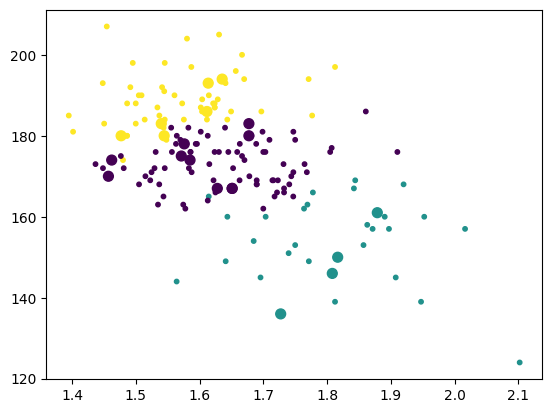

In [ ]:
plt.scatter(features['R 0.05']/features['B 0.05'], features['R 0.50'], c=kmeans.labels_, s= 40*data['status']+10)
plt.show()

In [ ]:
for i in range(3):
  print(sum(kmeans.labels_==i), np.sum(data['status']*(kmeans.labels_==i)))

86 10
31 4
56 6
